In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
import os, sys
import pandas as pd
from scipy.interpolate import interp1d

sys.path.append('../')
import NEXUSFunctions as nf

import matplotlib.dates as mdates
from   pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# ## NR 22
# t0 = datetime.datetime(2023,11,12,12, 0, 0)
# days_span = 6

## NR 21
t0 = datetime.datetime(2023, 8, 2,12, 0, 0)
days_span = 6

In [3]:
def dt_to_plc_str(dt):
    return dt.strftime("%y%m%d")
                       
def dt_to_mmr_str(dt):
    return dt.strftime("%Y-%m-%d")

print(dt_to_plc_str(t0))

230802


In [4]:
series_plc = nf.create_date_range(dt_to_plc_str(t0), days_span, fmt="%y%m%d")
offset_plc = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc   = nf.read_plclog_data(series_plc, offset_plc)

series_mmr = nf.create_date_range(dt_to_mmr_str(t0), days_span)
offset_mmr = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr   = nf.read_MACRT_data(series_mmr, offset_mmr)

The starting date is: 
2023-08-02 00:00:00
The starting date is: 
2023-08-02 00:00:00


In [5]:
def pd_td_to_hrs(tdelta):
    return tdelta.total_seconds()/3600.

def pd_td_to_days(tdelta):
    return tdelta.total_seconds()/(24.*3600.)

In [6]:
time_mmr = (data_mmr['ctime']-t0).apply(pd_td_to_days)

time_plc = (data_plc['ctime']-t0).apply(pd_td_to_days)

## Make the temperature plot

<IPython.core.display.Javascript object>


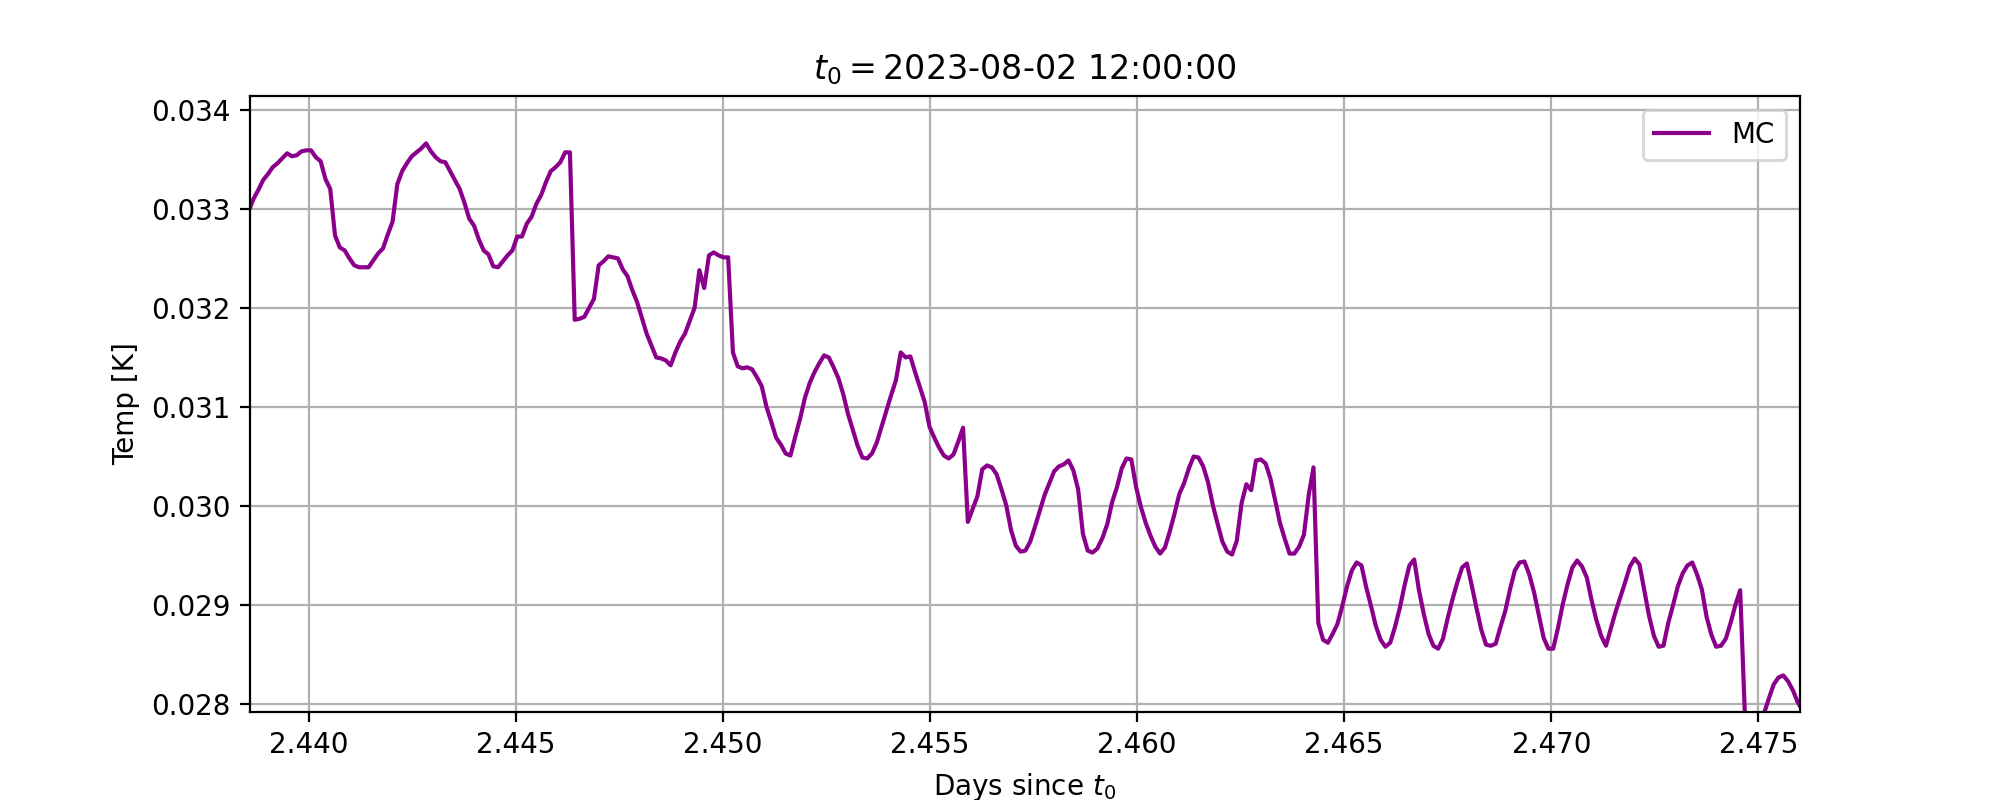

In [7]:
%matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Temp [K]')
a.set_title(r"$t_0=$"+str(t0))

c_CP = 'dodgerblue'
c_St = 'firebrick'
c_MC = 'darkmagenta'
c_1S = 'seagreen'
c_2S = 'goldenrod'

## Plot the PLC temperature data for Run 22
# a.plot(time_plc, data_plc['RuO2 CP']    , label='CP'   , color=c_CP)
# a.plot(time_plc, data_plc['Still Stage'], label='Still', color=c_St)
a.plot(time_plc, data_plc['FR MC']      , label='MC'   , color=c_MC)
# a.plot(time_plc, data_plc['1srt Stage'] , label='60K'  , color=c_1S)
# a.plot(time_plc, data_plc['2nd Stage']  , label='4K'   , color=c_2S)

# a.set_yscale('log')

# a.set_ylim([0.000 , 0.920])

plt.grid()
plt.legend(loc="best")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


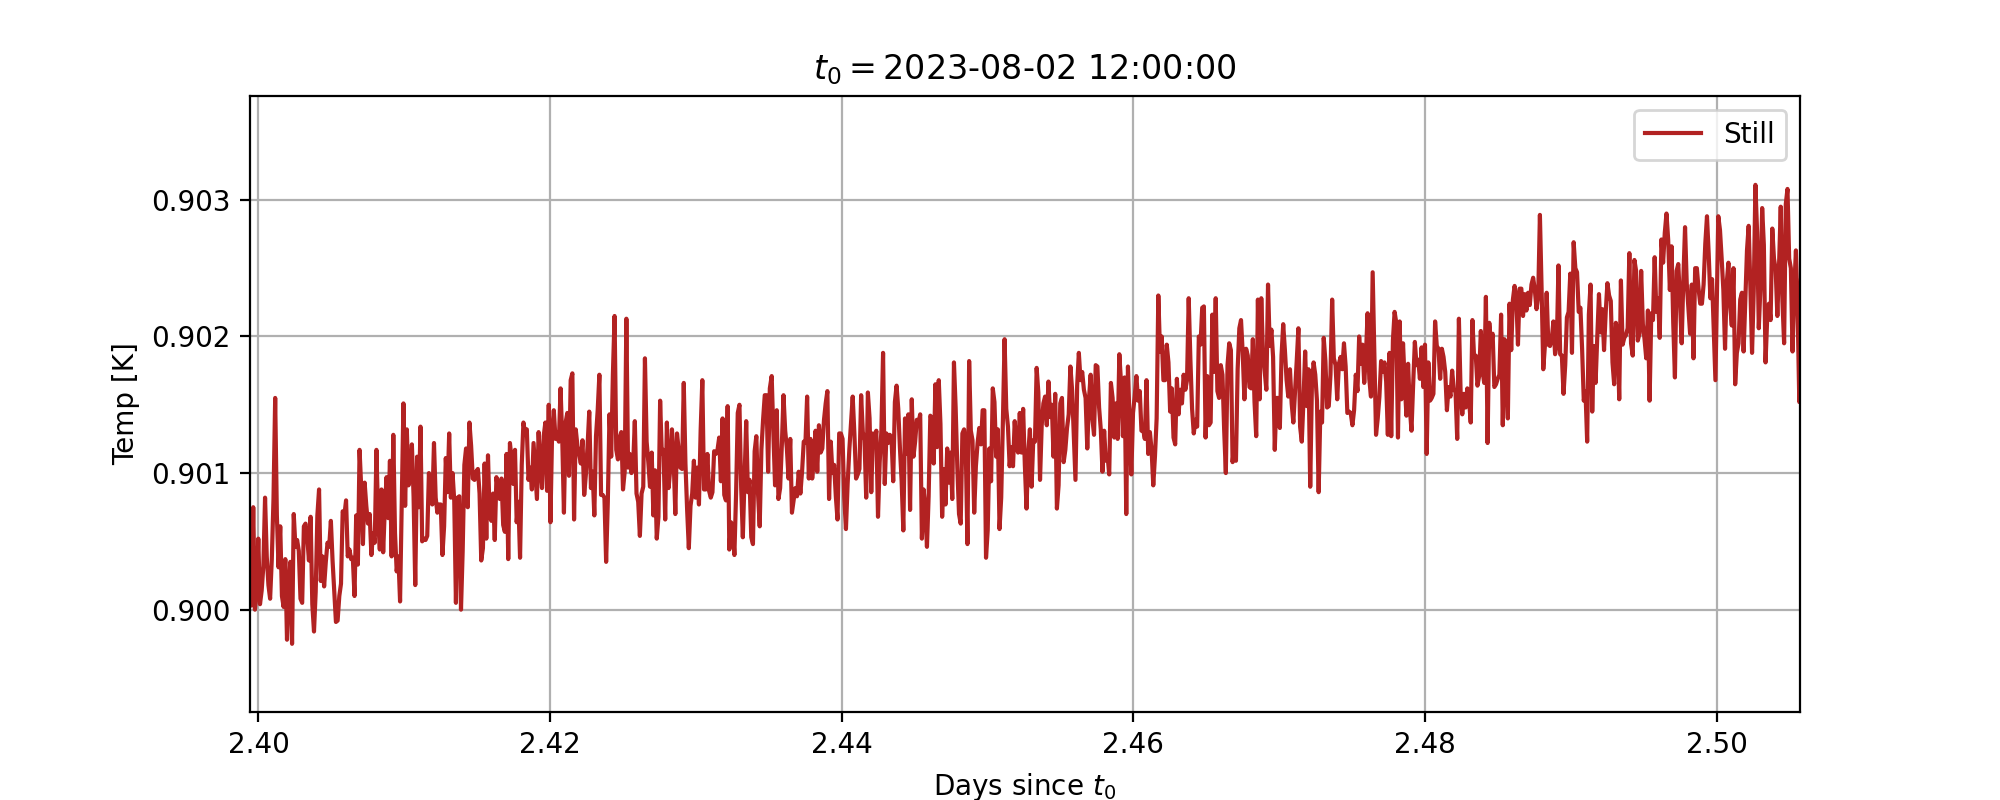

In [8]:
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Temp [K]')
a.set_title(r"$t_0=$"+str(t0))

c_CP = 'dodgerblue'
c_St = 'firebrick'
c_MC = 'darkmagenta'
c_1S = 'seagreen'
c_2S = 'goldenrod'

## Plot the PLC temperature data for Run 22
# a.plot(time_plc, data_plc['RuO2 CP']    , label='CP'   , color=c_CP)
a.plot(time_plc, data_plc['Still Stage'], label='Still', color=c_St)
# a.plot(time_plc, data_plc['FR MC']      , label='MC'   , color=c_MC)
# a.plot(time_plc, data_plc['1srt Stage'] , label='60K'  , color=c_1S)
# a.plot(time_plc, data_plc['2nd Stage']  , label='4K'   , color=c_2S)

# a.set_yscale('log')

# a.set_ylim([0.000 , 0.920])

plt.grid()
plt.legend(loc="best")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)